<a href="https://colab.research.google.com/github/saurabhsingh1411/AV_jantahack_computervision_emergency_vechicle/blob/main/AV_computer_vision_Emergency__truck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### importing file and lib

In [1]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import os 
  import zipfile 

In [2]:
zip_ref=zipfile.ZipFile('train_SOaYf6m.zip')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
train_dir='/tmp/images'
train_fnames=os.listdir(train_dir)
print(train_fnames[:10])
print('total training images:',len(os.listdir(train_dir)))

['1959.jpg', '732.jpg', '175.jpg', '885.jpg', '601.jpg', '1553.jpg', '2256.jpg', '1296.jpg', '793.jpg', '667.jpg']
total training images: 2352


In [4]:
train_imgname=pd.read_csv('/tmp/train.csv')
img_name=train_imgname['image_names']
t=list(np.array(img_name))
t[5:10]

['45.jpg', '2313.jpg', '1657.jpg', '294.jpg', '999.jpg']

In [5]:
train_imgname.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [6]:
import cv2 
X=[]

for img_name in t :
  img=cv2.imread('/tmp/images/'+img_name)
  X.append(img)
X=np.array(X)

print(X.shape)

(1646, 224, 224, 3)


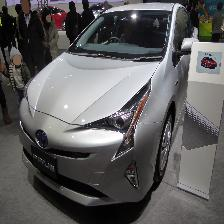

In [7]:
from google.colab.patches import cv2_imshow

cv2_imshow(X[0])

In [8]:
img_rows=224
img_cols=224
X=X.reshape(X.shape[0],img_rows,img_cols,-1)
X=X.astype('float32')
X/=255
print(X.shape)

(1646, 224, 224, 3)


In [9]:
y=train_imgname['emergency_or_not'].values

#from keras.utils import to_categorical
#y=to_categorical(y)

In [10]:
y[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [11]:
X[0:2].shape

(2, 224, 224, 3)

## Model Preparation 

In [12]:
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:

weights1="inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [14]:
pre_trained_model=InceptionV3(input_shape=(224,224,3),
                              include_top=False,
                              weights=None)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [15]:
last_layer=pre_trained_model.get_layer('mixed7')

print('last layer output shape:',last_layer.output_shape)
last_output=last_layer.output

last layer output shape: (None, 12, 12, 768)


In [16]:
from tensorflow.keras.optimizers import Adam

x=layers.Flatten()(last_output)

x = layers.Dropout(0.2)(x)                  
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [24]:

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 13, stratify=y)
(x_train.shape, y_train.shape), (x_val.shape, y_val.shape)

(((1481, 224, 224, 3), (1481,)), ((165, 224, 224, 3), (165,)))

In [25]:

train_datagen.fit(x_train)
#test_datagen.fit(y_train)

In [ ]:
from keras.callbacks import ModelCheckpoint
batch_size = 32
epochs = 30

history = model.fit(
    x_train, y_train, batch_size=batch_size,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val))

Epoch 1/30
46/46 [==============================] - 141s 3s/step - loss: 0.6856 - accuracy: 0.5795 - val_loss: 0.6783 - val_accuracy: 0.5879
Epoch 2/30
46/46 [==============================] - 140s 3s/step - loss: 0.6778 - accuracy: 0.5928 - val_loss: 0.6748 - val_accuracy: 0.5879
Epoch 3/30
46/46 [==============================] - 139s 3s/step - loss: 0.6784 - accuracy: 0.5859 - val_loss: 0.6736 - val_accuracy: 0.5879
Epoch 4/30
46/46 [==============================] - 142s 3s/step - loss: 0.6789 - accuracy: 0.5825 - val_loss: 0.6732 - val_accuracy: 0.5879
Epoch 5/30
46/46 [==============================] - 139s 3s/step - loss: 0.6799 - accuracy: 0.5783 - val_loss: 0.6729 - val_accuracy: 0.5879
Epoch 6/30
46/46 [==============================] - 138s 3s/step - loss: 0.6751 - accuracy: 0.5914 - val_loss: 0.6714 - val_accuracy: 0.5879
Epoch 7/30
46/46 [==============================] - 139s 3s/step - loss: 0.6770 - accuracy: 0.5832 - val_loss: 0.6712 - val_accuracy: 0.5879
Epoch 8/30
 3

In [ ]:
score = model.evaluate(x_val, y_val)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

## Creating prediction model 

In [ ]:
train_imgname_t=pd.read_csv('test.csv')
img_name_t=train_imgname_t['image_names']
t1=list(np.array(img_name_t))
t1[5:10]

In [ ]:
for img_name in t :
  img=cv2.imread('/tmp/images/'+img_name)
  X_test.append(img)
X_test=np.array(X_test)

print(X_test.shape)

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(X_test[0])

In [ ]:
img_rows=224
img_cols=224
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,-1)
X_test=X_test.astype('float32')
X_test/=255
print(X_test.shape)

In [ ]:
prediction=model.predict(X_test)

In [ ]:
y_classes=np.where(prediction>0.6,1,0)

## Submission

In [ ]:
sample=pd.read_csv('ss.csv')
sample['emergency_or_not']=y_classes
sample.to_csv('final_sample.csv',header=True,index=False)